# COS 3a Exercise 10

---
Submission until 07/01/2024 12:00 p.m.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Python Tutorial

In the course of this exercise, we need to store complex values. Complex values are numbers with a real and an imaginary part like: 

 $z=3 + 2i$

Whereas $i$ is the imaginary unit which satisfies $i^2=-1$. 

In Python, we can store complex values using different methods. The simplest way is to use the literal expression `3+2j`. 

Note that the imaginary unit in Python is denoted by `j` instead of `i`.



In [2]:
z = 3 + 2j
print('real:',z.real)
print('imaginary:',z.imag)

real: 3.0
imaginary: 2.0


Another possibility is to use the `complex()` function. The `complex()` function returns a complex number when real and imaginary parts are provided as arguments. 

In [3]:
z = complex(3,2)
print('real:',z.real)
print('imaginary:',z.imag)

real: 3.0
imaginary: 2.0


To specify a complex data array in Python, we can use `numpy`. 

On the one hand, we can manually specify the `dtype` of the array as `complex`. This is especially useful when intializing data arrays that are supposed to store complex values, but do not contain imaginary parts yet.

On the other hand, `numpy` automatically infers the `dtype` of the array to `complex` when at least one of the provided values contains an imaginary part.

In [4]:
# no complex element is given, but the dtype is complex
a = np.array([1, 2, 3], dtype=complex)
print('No complex value given (dtype=complex):',a)

# Only the first element is complex, but numpy will convert the other elements aswell
b = np.array([1+0j, 2, 3])
print('One element is complex:', b)

No complex value given (dtype=complex): [1.+0.j 2.+0.j 3.+0.j]
One element is complex: [1.+0.j 2.+0.j 3.+0.j]


# Introduction

## Fourier Transform (FT)

The Fourier transform is an integral transform, it takes a function in one domain as an input and returns function in another domain as output.

The output function is complex-valued and describes the extent to which different frequencies are present in the original function.

The general equation for the Fourier transform is given as:

\begin{equation*}
F(k) = \int_{-\infty}^{\infty} f(x) e^{-i2 \pi  k x}dx
\end{equation*}

Where $x$ is the independent variable of the original function, $f(x)$ is the dependent variable of the original function, $k$ is the independent variable of the transformed function and $F(k)$ is the dependent variable of the transformed function.

https://en.wikipedia.org/wiki/Fourier_transform

## Discrete Fourier Transform (dFT)

The discrete Fourier transform (dFT) is a mathematical operation that converts a finite sequence of equidistant samples of a function into a sequence of the same length of equidistant samples of the discrete-time Fourier transform (DTFT), which is a complex-valued frequency function.

The dFT makes it possible to analyze the frequency components of a signal, such as amplitude, phase and energy. The dFT can be calculated efficiently with the fast Fourier transform (FFT) algorithm.

The expresion for the Discrete Fourier Transform is:

\begin{equation*}
X_k = \sum_{n = 0}^{N-1} x_n e^{-i2 \pi n  k/N }dx
\end{equation*}

Where $x_n$ is the value of the original sequence at time index $n$. $k$ is the frequency index of the transformed sequence, $X_k$ is the value of the transformed sequence at the frequency index $k$ and $N$ is the length of the sequence.

That means we need to collect a signal of $N$ data points with values $x$. 

https://en.wikipedia.org/wiki/Discrete_Fourier_transform

## Fast Fourier Transform (FFT)

In order to compute the Discrete Fourier Transform (dFT) of an equidistant sample, we can use the FFT algorithm which is an efficient way to compute the dFT.

https://en.wikipedia.org/wiki/Fast_Fourier_transform

The following example shows a continous signal, which is represented by a $sin$ function (<span style="color:red">red</span>). Furthermore, the signal is sampled at $N$ equidistant points (<span style="color:blue">blue</span>). 

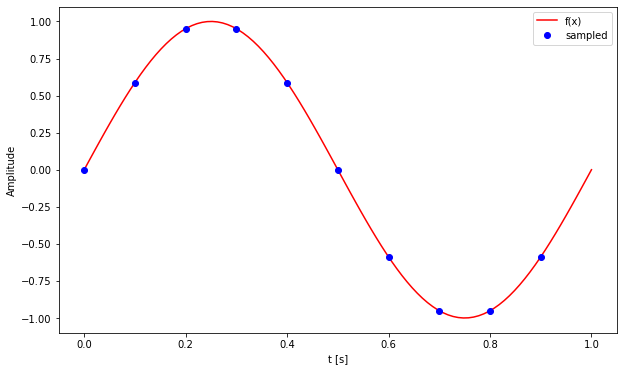

Sampled points: [ 0.    0.59  0.95  0.95  0.59  0.   -0.59 -0.95 -0.95 -0.59]


In [5]:
# Sinus function
def f_(x: np.array, freq: np.array) -> np.array:
    """
    Args:
        x (np.array): The input value
        freq (np.array): The frequency
    Returns:
        np.array : The sine of the input value multiplied by the frequency.
    """
    w = 2*np.pi*freq
    return np.sin(w*x)

# Sampling rate (sr) and sampling interval (si)
sr = 100
si = 0.1 # So a sample every 0.1 seconds

x = np.linspace(0, 1, sr)
freq = 1.

# Continuous plot
plt.figure(figsize = (10, 6))
plt.plot(x, f_(x, freq=freq), label='f(x)', color='red')

# Sampled points
x_ = np.arange(0, 1, si)
sampled = f_(x_, freq=freq)
plt.plot(x_, sampled,'bo', label='sampled')

plt.xlabel('t [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

print('Sampled points:', sampled.round(2))

Instead of a continuous signal over $t$, we now have discrete data points at evenly spaced intervals in time $t_n = \frac{n}{N}$ with $n \in \mathbb{N} \cap [0, N)$.

In the discrete Fourier transform (dFT), we transform the vector $\mathbf{x}$ (our discrete data points) to a corresponding vector in Fourier space $\mathbf{X}$, which contains the values $X_k$.

The transformation matrix is determined by evaluating $e^{-i2\pi kn/N}$ for the respective values of $n$ and $k$.

We use the notation $w = e^{-i2\pi /N}$ and can write the transformation as:

\begin{equation*}
  \begin{pmatrix}
  X_0 \\
  X_1 \\
  X_2 \\
  \vdots \\
  X_{N-1}
  \end{pmatrix}
  =
  \begin{pmatrix}
  1 & 1 & 1 & \cdots & 1 \\
  1 & w & w^2 & \cdots & w^{N-1} \\
  1 & w^2 & w^4 & \cdots & w^{2(N-1)} \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  1 & w^{N-1} & w^{2(N-1)} & \cdots & w^{(N-1)(N-1)}
  \end{pmatrix}
  \begin{pmatrix}
  x_0 \\
  x_1 \\
  x_2 \\
  \vdots \\
  x_{N-1}
  \end{pmatrix}
\end{equation*}

The first vector represents the transformed function at discrete points in the frequency domain. The matrix is the transformation matrix with dimensions $N \times N$. The last vector represents the function at discrete points in the time domain.


This equation can be rewritten as a linear algebra problem, where the values of $\mathbf{X}$ are complex numbers. Formally, we need to perform a matrix-vector multiplication, i.e., $N \times N$ element-wise multiplications to obtain $\mathbf{X}$, resulting in an overall quadratic scaling.

For the example shown above, $\mathbf{X}$ will contain only zeros, except for $X_1 = -X_9 = -i \cdot 0.5$.

### Information on the FFT

The Fast Fourier Transform (FFT) is an efficient algorithm for calculating the discrete Fourier Transform (dFT) of a sequence. This algorithm was first described in Cooley and Tukey’s paper from 1965. Interestingly, Gauss was aware of this algorithm more than 150 years earlier, as indicated in his unpublished work from 1805.

The FFT algorithm recursively breaks the dFT into smaller dFTs, reducing the computational scaling from $O(N^2)$ to $O(N \cdot \log_2 N)$, where $N$ is the number of data points. This reduction in computation time distinguishes FFT from the regular dFT.

FFT is widely used in engineering and science, particularly in signal processing and data compression. In the regular dFT, one can set up this matrix and multiply it with the samples in the time (or real space) domain.


## Task 1

In the first task we will proof that the Fourier transform is periodic. Then we will generate our input data from a user-defined function.

To proof that $X_k = X_{k+N}$ we need to use $e^{−𝑖2\pi 𝑚} = 1, ∀ 𝑚 ∈ N$ and the expression for the discrete FT.

#### 1.1 Show that $X_{k+N} = X_{k}$, where $N$ is the total number of data points.


#### 1.2 Generate a superposition of three cosine functions and plot the superposition:

\begin{equation*}
𝑓(𝑡)= A_a ⋅cos\omega_a t + A_b ⋅cos\omega_b 𝑡 + 𝐴_c ⋅cos\omega_c t
\end{equation*}

with

\begin{equation*}
A_a = 1.0,\, 𝐴_b = 3.0,\, A_c = 5.0
\end{equation*}

and

\begin{equation*}
\omega_a = 2\pi⋅100 \,\mathrm{Hz}  ,\,\omega_b  =2\pi⋅25 \,\mathrm{Hz}  ,\,\omega_c  =2\pi ⋅ 1 \,\mathrm{Hz} 
\end{equation*}

We will sample $\bf{x}$ with $N$ = 512 from 𝑓(𝑡) on a time interval between 0 and 1 s.

## Task 2

#### 2.1 Define a function to compute the dFT and then plot the absolute Fourier coefficients of the function defined in Task 1.

Refere to the introduction for a detailed explanation.



#### 2.2 Print out the number of non-zero points in the Fourier transformed data. For simplicity, we consider every element larger than 0.001 to be nonzero. Also give the ratio of the non-zero points relative to the full data set.

#### 2.3 Define an inverse discrete FT function and plot the inverse of the fourier transformation.

Note: The inverse function should be able to reconstruct the plot in Task 1.b by applying the inverse FT to the transformed data from Task 2.a.


#### 2.4 (OPTIONAL) Define a recursive FFT function based on the algorithm proposed by Cooley-Tukey. Call your FFT function and calculate the fourier transformation of the function in Task 1. Plot your results.

Note: The input signal to FFT should have a length of power of 2. If this is not given you can pad the input signal with zeros.

\begin{equation}
X_k=\sum_{n=0}^{N / 2-1} x_{2 n} \cdot e^{-i 2 \pi k n /(N / 2)}+e^{-i 2 \pi k / N} \sum_{n=0}^{N / 2-1} x_{2 n+1} \cdot e^{-i 2 \pi k n /(N / 2)}
\end{equation}

## Task 3: Image Compression
The fast Fourier transform (FFT) is a powerful tool for image compression, allowing us to efficiently represent the frequency content of an image. Image compression reduces the size of an image file by eliminating redundant or unnecessary information. This process leverages the fact that the human eye is less sensitive to high-frequency details, such as fine textures.

One effective approach to image compression involves transforming the image into the frequency domain using the 2D-FFT, then removing small amplitude components. This method smooths out fine details and textures, reducing the amount of information that needs to be stored. The simplified image can then be transformed back into the spatial domain using the inverse 2D-FFT, resulting in a lower resolution version of the original image.

This technique, known as lossy compression, permanently removes some information from the original image. It is suitable for images that do not require high detail, such as web graphics or images viewed from a distance. For images needing high detail, such as medical images or photographs, lossless compression methods are preferred, as they preserve all original information.

Using `numpy`'s built-in `fft2` (2D-FFT) and `ifft2` (inverse 2D-FFT) functions, we can recreate an image. Below is a template for performing 2D-FFT and inverse 2D-FFT, inspired by Steven L. Brunton and J. Nathan Kutz's work (Chapter 2): http://databookuw.com/. Note that numpy's 1D-FFT routines, similar to those you coded above, are called `fft` and `ifft`.


#### 3.1 Using this template, try to compress the image available for download from Moodle or the Jupyter hub. We will work with the grayscale component, using the matrix $\bf{Abw}$ obtained by converting the colored image to grayscale.

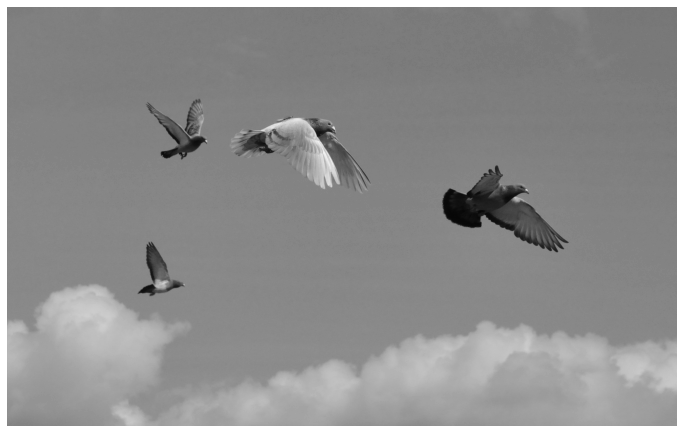

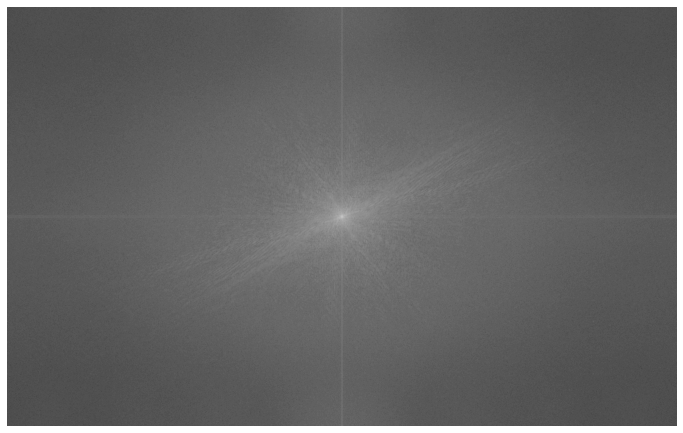

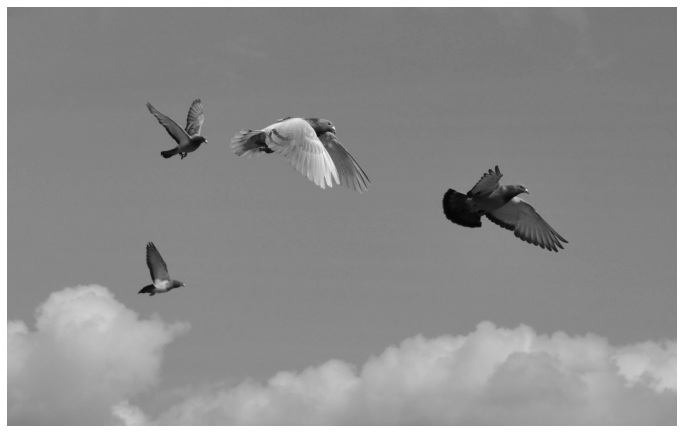

In [7]:
from matplotlib.image import imread
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

#importing an image
A = imread('./data/exercise_10/birds.jpg')
Abw = np.mean(A, -1); # Convert RGB to grayscale

# plot image via matplotlib
plt.imshow(Abw,cmap='gray')
plt.axis('off')
plt.show()

# Compute 2D-FFT of image using fft2 and store in At
At = np.fft.fft2(Abw)

# Put the FFT on a log scale and plot
F = np.log(np.abs(np.fft.fftshift(At))+1) # Put FFT on log scale
plt.imshow(F,cmap='gray')
plt.axis('off')
plt.show()


# Compute Inverse FFT, recreate the image back and plot it
Ar = np.real(np.fft.ifft2(At)).astype('uint8')
plt.imshow(Ar,cmap='gray')
plt.axis('off')
plt.show()

#### 3.2 Using the 2D-FFT of the image from 3.1, zero-out all components that are smaller than the given threshold and recompute the image from the pruned data.